# 데이터 전처리
1. 미싱 데이터 처리
2. K-Fold Cross Validation
3. 피쳐 스케일링
4. 원핫 인코딩



In [1]:
import pandas as pd
import numpy as np

## 전처리를 위한 데이터셋 불러오기
구매 예측 데이터를 가져온다.

In [2]:
purchased_df = pd.read_excel('DataPreprocess.xlsx')
purchased_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
x = purchased_df.drop(['Purchased'], axis=1).values
y = purchased_df['Purchased'].values

print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## 미싱 데이터 처리

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # 산술 평균
imputer.fit(x[:,1:3]) # 학습
x[:,1:3] = imputer.transform(x[:,1:3]) # 빈 값을 mean으로 채워넣는다.
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## K-Fold Cross Validation

In [5]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=1234)

## cv.split(x)의 의미
# Generate indices to split data into training and test set.
# 데이터를 훈련 세트와 테스트 세트로 분할하기 위한 인덱스를 생성합니다.
for train_index, test_index in cv.split(x):
    print(f'train index: {train_index}')
    print('.' * 80)
    print(f'test index: {test_index}')
    print('=' * 80)

train index: [0 1 3 4 5 6 8 9]
................................................................................
test index: [2 7]
train index: [0 2 3 4 5 6 7 8]
................................................................................
test index: [1 9]
train index: [1 2 3 4 5 6 7 9]
................................................................................
test index: [0 8]
train index: [0 1 2 3 6 7 8 9]
................................................................................
test index: [4 5]
train index: [0 1 2 4 5 7 8 9]
................................................................................
test index: [3 6]


## 피쳐 스케일링
편향된 원본 데이터 

In [6]:
x[:,1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

(0.0, 80000.0)

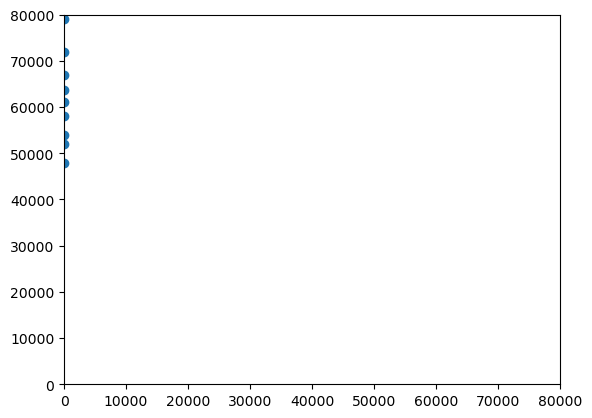

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x[:,1], x[:,2])
plt.xlim(0,80000)
plt.ylim(0,80000)

In [8]:
from sklearn.preprocessing import StandardScaler

# StandardScaler: 평균이 0이고 분산이 1인 가우시안 정규 분포
sc_x = StandardScaler()
sc_x.fit(x[:,1:3]) # 원본 데이터를 학습한다.
x[:,1:3] = sc_x.transform(x[:,1:3]) # 데이터를 평균이 0이고 분산이 1인 가우시안 정규 분포로 변환한다.

(-3.0, 3.0)

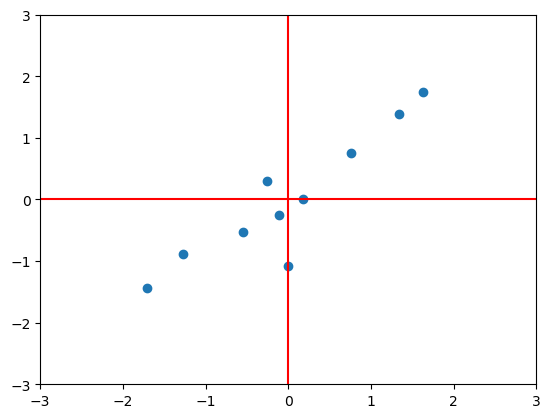

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x[:,1], x[:,2])
plt.axhline(y=0, color='r', linestyle='-') # y 선
plt.axvline(x=0, color='r', linestyle='-') # x 선
plt.xlim(-3,3)
plt.ylim(-3,3)

## 레이블 인코딩 실행

In [10]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

purchased_le = LabelEncoder()
purchased_le.fit(y) # 학습

LabelEncoder()

In [12]:
y = purchased_le.transform(y) # Yes, No -> 0, 1
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [13]:
purchased_le.inverse_transform(y) # 거꾸로 레이블을 다시 Yes, No

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [14]:
Country = ['France', 'Spain', 'Germany']

country_ohe = OneHotEncoder(categories=[Country], handle_unknown='ignore')
country_ohe.fit(x[:, 0].reshape(-1,1)) # 변환할 2차원 데이터 

ohe_country = country_ohe.transform(x[:, 0].reshape(-1,1)).toarray() # 변환 후 ndarray로 출력
ohe_country

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [20]:
csr_matrix = country_ohe.transform(x[:, 0].reshape(-1,1))
type(csr_matrix)

scipy.sparse._csr.csr_matrix

In [22]:
csr_matrix.toarray()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
x[:,1:] # Country열을 제거

x = np.concatenate([ohe_country, x[:,1:]], axis=1)
x

array([[1.0, 0.0, 0.0, 0.758874361590019, 0.7494732544921677],
       [0.0, 1.0, 0.0, -1.7115038793306814, -1.4381784072687531],
       [0.0, 0.0, 1.0, -1.2755547779917342, -0.8912654918285229],
       [0.0, 1.0, 0.0, -0.1130238410878753, -0.253200423814921],
       [0.0, 0.0, 1.0, 0.17760889313808945, 6.632191985654332e-16],
       [1.0, 0.0, 0.0, -0.5489729424268225, -0.5266568815350361],
       [0.0, 1.0, 0.0, 0.0, -1.0735697969752662],
       [1.0, 0.0, 0.0, 1.3401398300419485, 1.3875383225057696],
       [0.0, 0.0, 1.0, 1.6307725642679132, 1.7521469327992565],
       [1.0, 0.0, 0.0, -0.2583402082008577, 0.29371249162530916]],
      dtype=object)

In [17]:
columns = ['France', 'Spain', 'Germany', 'Age', 'Salary', 'Purchased']
preprocced_data = np.concatenate([x, y.reshape(-1,1)], axis=1)
pd.DataFrame(preprocced_data, columns=columns)

,France,Spain,Germany,Age,Salary,Purchased
0,1.0,0.0,0.0,0.758874,0.749473,0
1,0.0,1.0,0.0,-1.711504,-1.438178,1
2,0.0,0.0,1.0,-1.275555,-0.891265,0
3,0.0,1.0,0.0,-0.113024,-0.2532,0
4,0.0,0.0,1.0,0.177609,0.0,1
5,1.0,0.0,0.0,-0.548973,-0.526657,1
6,0.0,1.0,0.0,0.0,-1.07357,0
7,1.0,0.0,0.0,1.34014,1.387538,1
8,0.0,0.0,1.0,1.630773,1.752147,0
9,1.0,0.0,0.0,-0.25834,0.293712,1


In [18]:
purchased_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes
